## Load libraries

In [1]:
# tensorflow backend
print('tensorflow backend')
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
print('vae stuff')
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
print('iport scientific py')
import numpy as np
import pandas as pd
# rdkit stuff
print('rdkit stuff')
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
print('plotting stuff')
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import numpy as np 

tensorflow backend
vae stuff


Using TensorFlow backend.
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packag

iport scientific py
rdkit stuff
plotting stuff


## Load a model

In [2]:
vae = VAEUtils(directory='models/zinc_properties')

From C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\backend\tensorflow_backend.py:1210: calling reduce_prod (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\models.py:245: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
From C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\backend\tensorflow_backend.py:1192: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
From C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\backend\tensorflow_backend.py:1156: calling reduce_max (from tensorflow.python.ops.mat

Using standarized functions? True
Standarization: estimating mu and std values ...done!


## Decode several attempts

In [49]:
def add_similars(smiles_in, index):
    smiles = mu.canon_smiles(smiles_in)
    X_1 = vae.smiles_to_hot(smiles, canonize_smiles=True)
    Z_1 = vae.encode(X_1)[0]
    noise=4.0
    print('Searching molecules randomly sampled from {:.2f} std (z-distance) from the point...'.format(noise))
    df = vae.z_to_smiles( Z_1,decode_attempts=100,noise_norm=noise )
    print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
    Xs = [ vae.smiles_to_hot(mol, canonize_smiles=True) for mol in list(set(df['smiles'])) ]
    Zs = [ vae.encode(X)[0] for X in Xs ]
    group.extend(list(zip(Zs, np.full(len(Zs), index))))

## Clustering Samples

In [50]:
group = []
add_similars('N[C@@H](CC1=CNC=N1)C(O)=O', 0)
add_similars('c1ccccc1', 1)
add_similars('NCCC[C@H](N)C(O)=O', 2)
add_similars('N[C@@H](CO)C(O)=O', 3)
add_similars('OC(=O)CCC(O)=O', 4)

Searching molecules randomly sampled from 4.00 std (z-distance) from the point...
Found 9 unique mols, out of 58
Searching molecules randomly sampled from 4.00 std (z-distance) from the point...
Found 19 unique mols, out of 47
Searching molecules randomly sampled from 4.00 std (z-distance) from the point...
Found 9 unique mols, out of 30
Searching molecules randomly sampled from 4.00 std (z-distance) from the point...
Found 6 unique mols, out of 88
Searching molecules randomly sampled from 4.00 std (z-distance) from the point...
Found 26 unique mols, out of 40


## Build DimReduction Model

In [51]:
n_components = 2
model_pca = PCA(n_components=n_components)
model_tsne = TSNE(n_components=n_components)

In [60]:
points_tsne = model_tsne.fit_transform([ points[0] for points in group ])

## Visualize the data

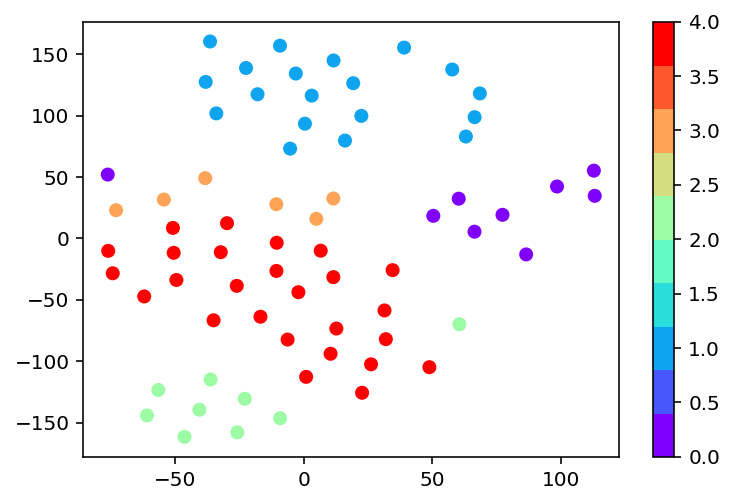

In [64]:
x1 = [ point[0] for point in points_tsne ]
y1 = [ point[1] for point in points_tsne ]
target1 = [ item[1] for item in group ]

cmap = plt.cm.get_cmap('rainbow', 10)
plt.scatter(x1, y1, c=target1, cmap=cmap)
plt.colorbar()

In [ ]:
list(range(2, 2))